<class 'numpy.ndarray'>


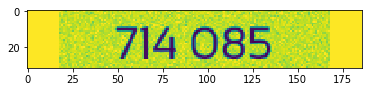

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def image_preporcess(image, target_size):

    # resize 尺寸
    ih, iw = target_size
    # 原始图片尺寸
    h,  w = image.shape

    # 计算缩放后图片尺寸
    scale = min(iw/w, ih/h)
    nw, nh = int(scale * w), int(scale * h)
    image_resized = cv2.resize(image, (nw, nh))

    # 创建一张画布，画布的尺寸就是目标尺寸
    # fill_value=120为灰色画布
    image_paded = np.full(shape=[ih, iw], fill_value=255)
    dw, dh = (iw - nw) // 2, (ih-nh) // 2

    # 将缩放后的图片放在画布中央
    image_paded[dh:nh+dh, dw:nw+dw] = image_resized
    
#     # 将图片转为灰度图
#     img_gray = cv2.cvtColor(image_paded,cv2.COLOR_RGB2GRAY)
    
    # 归一化处理
    image_paded = image_paded / 255.

    return image_paded

if __name__=="__main__":
    # TODO cv2.imread(image_path, 0) 读取灰度图像
    image_path = "/Users/liuliangjun/Downloads/images/train/7387_714 085.png"
    image = cv2.imread(image_path, 0)
    img=image_preporcess(image,(32,186))
    print(type(img))
    plt.imshow(img)


In [103]:
from glob import glob
image_path = '/Users/liuliangjun/PycharmProjects/vance/images/girls/*'

x = []
y = []
for i in glob(image_path):
    y.append(int(i.split('_')[1][0]))
    
    image = cv2.imread(i, 0)
    x.append(image_preporcess(image,(100,100)))


In [104]:
x = np.array(x)

In [105]:
y = np.array(y)

In [106]:
x.shape

(42, 100, 100)

In [107]:
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [108]:
##### import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape

model = models.Sequential()

# 定义输入层
model.add(Reshape((100, 100, 1), input_shape=(100, 100)))

# 添加一层卷积层, 卷积层设置多少个filters就会有多少个输出
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# 添加一层池化层
model.add(MaxPooling2D(pool_size=(2, 2)))

# 再添加一层卷积层
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# 再添加一层池化层
model.add(MaxPooling2D(pool_size=(2, 2)))

# 再添加一层卷积层
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# 再添加一层池化层
model.add(MaxPooling2D(pool_size=(2, 2)))

# 进行flatten
model.add(Flatten())

# 添加全连接层
model.add(Dense(units=50, activation='relu'))

# 再添加一层全连接层作为输出层
model.add(Dense(units=2, activation='sigmoid'))

In [109]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_10 (Reshape)         (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 10, 10, 128)     

In [110]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [111]:
model.fit(x, y, batch_size=4, epochs=20)

Train on 42 samples
Epoch 1/20
42/42 [==============================] - 1s 32ms/sample - loss: 0.6984 - accuracy: 0.4762
Epoch 2/20
42/42 [==============================] - 1s 20ms/sample - loss: 0.6771 - accuracy: 0.5952
Epoch 3/20
42/42 [==============================] - 1s 19ms/sample - loss: 0.6786 - accuracy: 0.5952
Epoch 4/20
42/42 [==============================] - 1s 17ms/sample - loss: 0.6706 - accuracy: 0.5952
Epoch 5/20
42/42 [==============================] - 1s 16ms/sample - loss: 0.6452 - accuracy: 0.5952
Epoch 6/20
42/42 [==============================] - 1s 17ms/sample - loss: 0.6335 - accuracy: 0.7143
Epoch 7/20
42/42 [==============================] - 1s 17ms/sample - loss: 0.6649 - accuracy: 0.5714
Epoch 8/20
42/42 [==============================] - 1s 18ms/sample - loss: 0.5340 - accuracy: 0.7381
Epoch 9/20
42/42 [==============================] - 1s 18ms/sample - loss: 0.5046 - accuracy: 0.8095
Epoch 10/20
42/42 [==============================] - 1s 17ms/sample - l

In [80]:
img.shape

(100, 100)

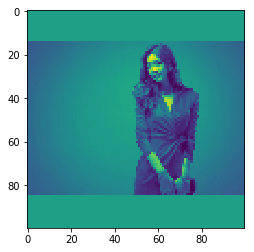

In [118]:
img_path = '/Users/liuliangjun/PycharmProjects/vance/images/girls/test005_1.png'
image = cv2.imread(img_path, 0)
img = image_preporcess(image,(100,100))
plt.imshow(img)

In [ ]:
# img.reshape(1, 100, 100)
# or 
# np.expand_dims(img,0)

In [101]:
# 返回值是数值，表示样本属于每一个类别的概率
model.predict(np.expand_dims(img,0))

array([[2.4635747e-06, 7.8915602e-01]], dtype=float32)

In [119]:
# 返回的是类别的索引，即该样本所属的类别标签。
model.predict_classes(np.expand_dims(img,0))

array([1])

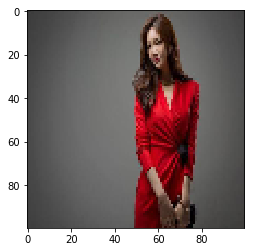

In [122]:
from sklearn.model_selection import train_test_split
# 用VGG16学习的特征来计算余弦相似性？
from keras.preprocessing import image
# ImageDataGenerator
# 图像增强 避免过拟合

# 从VGG16 抽取特征  https://keras-cn.readthedocs.io/en/latest/other/application/

from keras.preprocessing import image
img = image.load_img(img_path, target_size=(100, 100)) # 这个resize 会导致扭曲